In [2]:
import numpy as np
import pandas as pd
import os
import re
from collections import Counter

# For graphs
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Use cleaner absolute path to find file
path = os.path.abspath('politifact.csv')
df = pd.read_csv(path, index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24990 entries, 0 to 24989
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  24990 non-null  object
 1   source     24990 non-null  object
 2   link       24990 non-null  object
 3   veracity   24990 non-null  object
dtypes: object(4)
memory usage: 976.2+ KB


# Initially 24990 rows of non-null data

In [5]:
# to see statement in full
pd.set_option('display.max_colwidth', 200) 

# See sample of data
df.head(3)

,statement,source,link,veracity
0,"""Books banned in Texas include 1984, Maus, and The Handmaid's Tale, but not Mein Kampf.""",Tweets,/factchecks/2022/feb/14/tweets/those-titles-arent-banned-statewide-could-be-distr/,false
1,A video shows that “OnlyFans has guys on campus encouraging your daughters to do porn for ‘financial freedom.’”,Tweets,/factchecks/2022/feb/14/tweets/no-onlyfans-isnt-recruiting-adult-film-stars-colle/,false
2,“Nevada ranks 50th in election integrity ratings.”,Jesse Haw,/factchecks/2022/feb/14/jesse-haw/fact-checking-claim-nevada-ranks-close-last-electi/,barely-true


In [6]:
#check groups that exst in veracity column
df.veracity.value_counts()

false          12495
barely-true     4998
pants-fire      4165
mostly-true     1666
half-true       1666
Name: veracity, dtype: int64

In [7]:
ver_df = df[~df.isin(['half-true']).any(axis=1)]

ver_df.head(3)

,statement,source,link,veracity
0,"""Books banned in Texas include 1984, Maus, and The Handmaid's Tale, but not Mein Kampf.""",Tweets,/factchecks/2022/feb/14/tweets/those-titles-arent-banned-statewide-could-be-distr/,false
1,A video shows that “OnlyFans has guys on campus encouraging your daughters to do porn for ‘financial freedom.’”,Tweets,/factchecks/2022/feb/14/tweets/no-onlyfans-isnt-recruiting-adult-film-stars-colle/,false
2,“Nevada ranks 50th in election integrity ratings.”,Jesse Haw,/factchecks/2022/feb/14/jesse-haw/fact-checking-claim-nevada-ranks-close-last-electi/,barely-true


In [8]:
ver_df.veracity.value_counts()

false          12495
barely-true     4998
pants-fire      4165
mostly-true     1666
Name: veracity, dtype: int64

# Gathering data from hotels reviews


In [9]:
reviews_df = pd.read_csv('reviews.csv')

In [10]:
reviews_df.head(3)

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,"We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroo..."
1,truthful,hyatt,positive,TripAdvisor,"Triple A rate with upgrade to view room was less than $200 which also included breakfast vouchers. Had a great view of river, lake, Wrigley Bldg. & Tribune Bldg. Most major restaurants, Shopping, ..."
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catching up on my reviews from the past several months:) A dear friend and I stayed at the Hyatt Regency in late October 2007 for one night while visiting a...


In [11]:
reviews_df.deceptive.value_counts()

truthful     800
deceptive    800
Name: deceptive, dtype: int64

# Gathering data from longReviewsDataset

In [12]:
path = ('BachelorThesis/LongReviewsDataset/datasetSentences.txt')

long_reviews_df = pd.read_fwf(path, header=None)

In [13]:
long_reviews_df.head(3)

,0,1
0,sentence_index\tsentence,NaN
1,"1\tThe Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .",NaN
2,2\tThe gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision o...,NaN


In [14]:
long_reviews_df.keys()

Int64Index([0, 1], dtype='int64')

In [15]:
long_reviews_df = long_reviews_df.rename(columns={0 : "content", 1: "deceptive"})

In [16]:
#remove the first row for the data
long_reviews_df = long_reviews_df.iloc[1:, :]

In [17]:
long_reviews_df.head(3)

,content,deceptive
1,"1\tThe Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .",NaN
2,2\tThe gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision o...,NaN
3,3\tEffective but too-tepid biopic,NaN


In [18]:
long_reviews_df["Length"] = long_reviews_df["content"].map(len)

In [19]:
long_reviews_df.head(3)

,content,deceptive,Length
1,"1\tThe Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .",NaN,183
2,2\tThe gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision o...,NaN,229
3,3\tEffective but too-tepid biopic,NaN,32


In [20]:
#sort the reviews by their content message length

sorted_reviews_df = long_reviews_df.sort_values( by = 'Length')

In [21]:
long_reviews_df.Length.value_counts()

230    155
86     109
89     107
87      98
125     97
      ... 
224      4
11       3
9        3
225      3
12       3
Name: Length, Length: 222, dtype: int64

In [22]:
#getting just the entries that have more than 100 characters
only_long_df = long_reviews_df[long_reviews_df['Length'] >= 100]

In [23]:
len(only_long_df)

6284

# Continue working on the political.csv dataset

In [24]:
ver_df = ver_df.replace({
    'pants-fire' : 0,
    'false' : 0,
    'mostly-true' : 1,
    'barely-true' : 1,
})

ver_df.head(5)

,statement,source,link,veracity
0,"""Books banned in Texas include 1984, Maus, and The Handmaid's Tale, but not Mein Kampf.""",Tweets,/factchecks/2022/feb/14/tweets/those-titles-arent-banned-statewide-could-be-distr/,0
1,A video shows that “OnlyFans has guys on campus encouraging your daughters to do porn for ‘financial freedom.’”,Tweets,/factchecks/2022/feb/14/tweets/no-onlyfans-isnt-recruiting-adult-film-stars-colle/,0
2,“Nevada ranks 50th in election integrity ratings.”,Jesse Haw,/factchecks/2022/feb/14/jesse-haw/fact-checking-claim-nevada-ranks-close-last-electi/,1
3,“The second booster has eight strains of HIV.”,Facebook posts,/factchecks/2022/feb/14/facebook-posts/covid-19-vaccines-do-not-contain-hiv/,0
4,Virginia’s economic growth “has stalled at less than 1% per year for eight years.”,Glenn Youngkin,/factchecks/2022/feb/14/glenn-youngkin/has-virginias-economic-growth-stalled-less-1-young/,1


In [25]:
ver_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23324 entries, 0 to 24988
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  23324 non-null  object
 1   source     23324 non-null  object
 2   link       23324 non-null  object
 3   veracity   23324 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 911.1+ KB


In [26]:
# check the balance of the dataset
ver_df.veracity.value_counts()

0    16660
1     6664
Name: veracity, dtype: int64

In [27]:
# how many unique items per category?
ver_df.describe(include='all')


,statement,source,link,veracity
count,23324,23324,23324,23324.000000
unique,28,14,28,NaN
top,"""Books banned in Texas include 1984, Maus, and The Handmaid's Tale, but not Mein Kampf.""",Facebook posts,/factchecks/2022/feb/14/tweets/those-titles-arent-banned-statewide-could-be-distr/,NaN
freq,833,9996,833,NaN
mean,NaN,NaN,NaN,0.285714
std,NaN,NaN,NaN,0.451764
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,1.000000


In [28]:
# top 10 sources
ver_df.source.value_counts()[:10]

Facebook posts     9996
Bloggers           2499
Tweets             1666
Jesse Haw           833
Glenn Youngkin      833
Charlie Crist       833
Dave McCormick      833
JB Pritzker         833
Kevin Nicholson     833
JD Vance            833
Name: source, dtype: int64

# Verifiy the dates of the search

In [29]:

ver_df["date"] = ver_df.link.str.extract(r'(\d{4}/.+?\d{2})')


In [30]:
ver_df.link.value_counts()

/factchecks/2022/feb/14/tweets/those-titles-arent-banned-statewide-could-be-distr/             833
/factchecks/2022/feb/14/tweets/no-onlyfans-isnt-recruiting-adult-film-stars-colle/             833
/factchecks/2022/feb/10/facebook-posts/republicans-opposed-build-back-better-whole-not-ne/     833
/factchecks/2022/feb/10/facebook-posts/cs-lewis-didnt-write-pandemic-passage/                  833
/factchecks/2022/feb/10/viral-image/kendall-jenner-said-she-didnt-edit-share-altered-b/        833
/factchecks/2022/feb/10/facebook-posts/no-msnbc-didnt-announce-donald-trump-won-2020-elec/     833
/factchecks/2022/feb/10/troy-nehls/claim-kids-more-likely-have-access-crack-pipes-mas/         833
/factchecks/2022/feb/10/sean-spicer/no-white-house-isnt-spending-30-million-crack-pipe/        833
/factchecks/2022/feb/10/nicole-sirotek/no-hospitalized-covid-19-patients-werent-killed-re/     833
/factchecks/2022/feb/10/facebook-posts/viral-video-simulation-does-not-depict-real-grand-/     833
/factcheck

In [31]:
ver_df.date = pd.to_datetime(ver_df.date,infer_datetime_format=True)

In [32]:
ver_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23324 entries, 0 to 24988
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   statement  23324 non-null  object        
 1   source     23324 non-null  object        
 2   link       23324 non-null  object        
 3   veracity   23324 non-null  int64         
 4   date       23324 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.1+ MB


In [33]:
ver_df[:90:30]

,statement,source,link,veracity,date
0,"""Books banned in Texas include 1984, Maus, and The Handmaid's Tale, but not Mein Kampf.""",Tweets,/factchecks/2022/feb/14/tweets/those-titles-arent-banned-statewide-could-be-distr/,0,2022-02-14
32,“Nevada ranks 50th in election integrity ratings.”,Jesse Haw,/factchecks/2022/feb/14/jesse-haw/fact-checking-claim-nevada-ranks-close-last-electi/,1,2022-02-14
64,Virginia’s economic growth “has stalled at less than 1% per year for eight years.”,Glenn Youngkin,/factchecks/2022/feb/14/glenn-youngkin/has-virginias-economic-growth-stalled-less-1-young/,1,2022-02-14


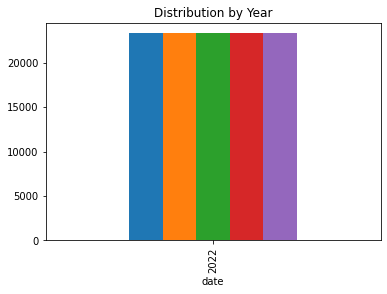

In [34]:
ax = ver_df.groupby(ver_df.date.dt.year).count().plot(kind="bar")
ax.legend_ = None
plt.title("Distribution by Year")
plt.show()


# Looking at the values from 2019 and see if there are duplicates

In [35]:
alternative_df = pd.read_csv('politifact_clean.csv')

In [36]:
alternative_df.head()

,statement,source,link,veracity
0,"Sen. Kamala Harris is ""supporting the animals of MS-13.""",Donald Trump,/web/20180705082623/https://www.politifact.com/california/statements/2018/jul/03/donald-trump/pants-fire-white-house-claim-sen-harris-supporting/,Pants on Fire!
1,"Says Ronald Reagan said immigrants ""brought with them courage and the values of family, work, and freedom. Let us pledge to each other that we can make America great again.""",Becoming American Initiative,/web/20180705082623/https://www.politifact.com/truth-o-meter/statements/2018/jul/03/becoming-american-initiative/did-ronald-reagan-say-immigrants-made-america-grea/,Mostly True
2,"Says Democratic Senators ""demand Supreme Court nominee not be unduly influenced by U.S. Constitution.""",Viral image,/web/20180705082623/https://www.politifact.com/punditfact/statements/2018/jul/03/viral-image/viral-image-criticizing-democrats-featured-fabrica/,Pants on Fire!
3,"""Tim Kaine doesn’t want a border at all. He wants to get rid of Immigration and Customs Enforcement and basically the border patrol as well.""",Corey Stewart,/web/20180705082623/https://www.politifact.com/truth-o-meter/statements/2018/jul/03/corey-stewart/corey-stewart-falsely-claims-sen-tim-kaine-wants-d/,Pants on Fire!
4,"""George H.W. Bush has died at 94.""",Bloggers,/web/20180705082623/https://www.politifact.com/punditfact/statements/2018/jul/02/blog-posting/hoax-website-says-george-h-w-bush-died-he-didnt/,Pants on Fire!


In [37]:
#getting the statements from the 2019 dataset
statements_1 = alternative_df[['statement', 'source']].copy()

In [38]:
statements_1.head()

,statement,source
0,"Sen. Kamala Harris is ""supporting the animals of MS-13.""",Donald Trump
1,"Says Ronald Reagan said immigrants ""brought with them courage and the values of family, work, and freedom. Let us pledge to each other that we can make America great again.""",Becoming American Initiative
2,"Says Democratic Senators ""demand Supreme Court nominee not be unduly influenced by U.S. Constitution.""",Viral image
3,"""Tim Kaine doesn’t want a border at all. He wants to get rid of Immigration and Customs Enforcement and basically the border patrol as well.""",Corey Stewart
4,"""George H.W. Bush has died at 94.""",Bloggers


In [39]:
statements_2 = ver_df[['statement', 'source']].copy()

In [40]:
statements_merge = pd.merge(statements_1, statements_2, on=['statement', 'source'], how='inner') 
statements_merge.head()

,statement,source


In [41]:
statements_merge['duplicated'] = statements_merge.duplicated(keep=False)

In [42]:
statements_merge.head()

,statement,source,duplicated


In [44]:
len(alternative_df)

11188

# Scraping the 2019 dataset

In [47]:
# check groups that exist in veracity column
alternative_df.veracity.value_counts()

Mostly True       2695
FALSE             2641
Mostly False      2335
TRUE              2158
Pants on Fire!    1359
Name: veracity, dtype: int64

In [58]:
ver_df_2 = alternative_df.replace({"FALSE": 0,
                                   "Mostly False": 0,
                                   "Pants on Fire!": 0,
                                   "TRUE": 1,
                                   "Mostly True": 1
    
})

In [59]:
ver_df_2.head(3)

,statement,source,link,veracity
0,"Sen. Kamala Harris is ""supporting the animals of MS-13.""",Donald Trump,/web/20180705082623/https://www.politifact.com/california/statements/2018/jul/03/donald-trump/pants-fire-white-house-claim-sen-harris-supporting/,0
1,"Says Ronald Reagan said immigrants ""brought with them courage and the values of family, work, and freedom. Let us pledge to each other that we can make America great again.""",Becoming American Initiative,/web/20180705082623/https://www.politifact.com/truth-o-meter/statements/2018/jul/03/becoming-american-initiative/did-ronald-reagan-say-immigrants-made-america-grea/,1
2,"Says Democratic Senators ""demand Supreme Court nominee not be unduly influenced by U.S. Constitution.""",Viral image,/web/20180705082623/https://www.politifact.com/punditfact/statements/2018/jul/03/viral-image/viral-image-criticizing-democrats-featured-fabrica/,0


In [60]:
ver_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11188 entries, 0 to 11187
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  11188 non-null  object
 1   source     11188 non-null  object
 2   link       11188 non-null  object
 3   veracity   11188 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 349.8+ KB


In [61]:
ver_df.head(3)

,statement,source,link,veracity,date
0,"""Books banned in Texas include 1984, Maus, and The Handmaid's Tale, but not Mein Kampf.""",Tweets,/factchecks/2022/feb/14/tweets/those-titles-arent-banned-statewide-could-be-distr/,0,2022-02-14
1,A video shows that “OnlyFans has guys on campus encouraging your daughters to do porn for ‘financial freedom.’”,Tweets,/factchecks/2022/feb/14/tweets/no-onlyfans-isnt-recruiting-adult-film-stars-colle/,0,2022-02-14
2,“Nevada ranks 50th in election integrity ratings.”,Jesse Haw,/factchecks/2022/feb/14/jesse-haw/fact-checking-claim-nevada-ranks-close-last-electi/,1,2022-02-14


# Merge 2 pandas datasets

In [69]:
ver_df = ver_df.drop(['date'], axis=1)

In [70]:
ver_df_united = pd.concat([ver_df, ver_df_2])

In [71]:
print(len(ver_df))
print(len(ver_df_2))
print(len(ver_df_united))

23324
11188
34512


In [72]:
ver_df_united.veracity.value_counts()

0    22995
1    11517
Name: veracity, dtype: int64

In [73]:
#by concatanating the 2 datasests, we made sure that, even if the dataframe is overall imbalaced, we kept a ratio of 2:1 between 
# the false affirmation and the truthfull ones

In [74]:
# top 10 sources
ver_df_united.source.value_counts()[:10]

Facebook posts     10081
Bloggers            2747
Tweets              1679
Charlie Crist        893
Viral image          870
Sean Spicer          843
JB Pritzker          835
Kevin Nicholson      834
Jesse Haw            833
Glenn Youngkin       833
Name: source, dtype: int64

In [75]:
ver_df_united[:100:10]

,statement,source,link,veracity
0,"""Books banned in Texas include 1984, Maus, and The Handmaid's Tale, but not Mein Kampf.""",Tweets,/factchecks/2022/feb/14/tweets/those-titles-arent-banned-statewide-could-be-distr/,0
10,Says a Washington Post headline and graphic about COVID-19 deaths are misleading.,Facebook posts,/factchecks/2022/feb/11/facebook-posts/facebook-post-cries-foul-washington-post-headline-/,0
20,Says remdesivir is responsible for killing patients hospitalized with COVID-19.,Nicole Sirotek,/factchecks/2022/feb/10/nicole-sirotek/no-hospitalized-covid-19-patients-werent-killed-re/,0
32,“Nevada ranks 50th in election integrity ratings.”,Jesse Haw,/factchecks/2022/feb/14/jesse-haw/fact-checking-claim-nevada-ranks-close-last-electi/,1
42,“A larger percentage of Illinoisans have been vaccinated than in any other Midwestern state.”,JB Pritzker,/factchecks/2022/feb/11/jb-pritzker/does-illinois-have-larger-percentage-vaccinations-/,1
52,"""In Joe Biden’s America, your children are more likely to have access to a crack pipe than a mask-free education.""",Troy Nehls,/factchecks/2022/feb/10/troy-nehls/claim-kids-more-likely-have-access-crack-pipes-mas/,0
64,Virginia’s economic growth “has stalled at less than 1% per year for eight years.”,Glenn Youngkin,/factchecks/2022/feb/14/glenn-youngkin/has-virginias-economic-growth-stalled-less-1-young/,1
74,Says Bob Saget predicted his death,Facebook posts,/factchecks/2022/feb/10/facebook-posts/no-bob-saget-didnt-predict-his-death/,0
85,Kendall Jenner edited a photo to look like she was holding a “Black Lives Matter” sign.,Viral image,/factchecks/2022/feb/10/viral-image/kendall-jenner-said-she-didnt-edit-share-altered-b/,0
96,"COVID spelled backward is “divoc” which means ""possession of the evil spirit"" in Hebrew.",Facebook posts,/factchecks/2022/feb/11/facebook-posts/covid-spelled-backward-divoc-which-means-possessio/,0


In [76]:
ver_df_united.to_csv('2022_03_13_politifact_cleaned_data.csv')

# We'll use a begins-with-and-ends-with-quotations filter going forward

In [77]:
quote_df = df[df.statement.str.match(r'\"')==True]
quote_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3332 entries, 0 to 24987
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  3332 non-null   object
 1   source     3332 non-null   object
 2   link       3332 non-null   object
 3   veracity   3332 non-null   object
dtypes: object(4)
memory usage: 130.2+ KB


In [78]:
# remove sentences that don't end with a quotation
quote_df = quote_df[quote_df.statement.str.endswith('"')==True]
quote_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 24982
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  1666 non-null   object
 1   source     1666 non-null   object
 2   link       1666 non-null   object
 3   veracity   1666 non-null   object
dtypes: object(4)
memory usage: 65.1+ KB
